# Série 49, Matricule étudiant : 51971

## Exercice 1

- a : La statistique descriptive n'essaye pas d'extrapoler des résultats obtenus sur un petit échantillon à la totalité de la population.

Vrai : La statistique analyse sur une population donnée et ne tente donc pas d'extrapoler à la totalité de la population.

Corr: OK 1/1

- b : La variance d'une variable ne peut pas s'exprimer comme une covariance.

Faux : La variance est un cas particulier de covariance(X,X), elle peut donc s'exprimer comme une covariance.

Corr: OK 1/1

- c : La médianne d'une carractéristique d'une population est toujours une valeur présente dans les modalités de cette carractéristique de la population

Vrai : La médiane est la valeur centrale de la population, celle à partir de laquelle on a 50% des données avant elle et 50% des données après elle.

Corr: La réponse attendue est Faux car ce n'est que que dans le cas d'un nombre impair de valeurs que la médiane est bien présente dans les modalités.
=> 0/1

- d : On considère un caractère continu d'une population. Si on multiplie ce caractère par une valeur constante alpha pouvant être négative, la dispertion de ces nouvelles valeurs sera aussi multipliée par alpha.

Vrai : La dispertion est également multipliée par le facteur alpha.

Corr: Réponse attendue Faux car cela dépend de comment on évalue la dispersion. Si c'est l'écart-type, alors le facteur sera |alpha|. Si c'est la variance, ce sera alpha^2. Si c'est l'étendue ce sera aussi |alpha|. Donc, en général ce n'est PAS le simple facteur alpha.
=> 0/1

- e : La covariance de deux variables statistiques x et y n'est pas une fonction asymétrique dans ses variables.

Vrai : la covariance est une fonction symétrique car Cov(X,Y) = Cov(Y,X).

Corr: OK 1/1

- f : Pour qu'un modèle soit satisfaisant d'un point de vue statistique, il faut que la distribution des résidus soit centrée sur zéro.

Vrai : Si la distribution est centrée sur 0, cela signifie que les résidus sont faibles et que donc le modèle est satisfaisant.

Corr: OK pour le Vrai mais pas pour la justification... centré sur zéro ne veut pas dire proche de zéro mais surtout distribué de part et d'autre de zéro (tantôt positif, tantôt négatif)
=> 0.5/1

- g : Le quartile 2 et le centile 50 sont équivalents.

Vrai : Car le quartile 2 et le centile 50 sont tous les deux équivalents à la médianne.

Corr: OK 1/1

- h : Dans une distribution gaussienne, la probabilité que la valeur X se trouve dans l'intervalle [mu-1 * sigma, mu+1 * sigma] est approximativement 99,73%

Faux : La bonne probabilité pour [mu-1*sigma, mu+1*sigma] est approximativement 68,27%

Corr: OK 1/1

Question 1: 5.5/8

## Exercice 2

On a,

50 noeuds déffectueux pour n = 1 000 000

pour n = 10 000, quel est la valeur de p si x = 3 ?

On cherche P(X=3) sachant que 
n = 10000

On calcule p sur base de l'énoncé :
p = 50/1 000 000

Comme n est grand, on peut approximer avec une loi binomiale


In [12]:
from scipy.stats import binom

n = 10000
p = 50 / 1000000
x = 3

P = binom.pmf(x,n,p)
print("Probabilité pour exactement 3 déffectueux avec n = 10000 et p = 50/1000000 en approximant avec une loi binomiale :\n", P)

Probabilité pour exactement 3 déffectueux avec n = 10000 et p = 50/1000000 en approximant avec une loi binomiale :
 0.012634001944728784


Corr: Question 2:

OK pour la valeur de probabilité (même si bcp trop de décimales non significatives) mais la loi binomiale n'est certainement PAS une approximation.
Ce serait plutôt la loi de Poisson qui pourrait être une approximation mais que tu n'utilises pas ici!!!
=> 1.5/2

# Exercice 3

On charge les données du fichier

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('polonium210.sample3.csv', sep=',')
data

,time,prop
0,5.5,99.09
1,7.5,95.58
2,14.5,89.57
3,16.0,87.52
4,26.5,82.03
...,...,...
95,491.0,8.16
96,494.5,8.45
97,496.5,5.91
98,497.0,11.93


- a

On affiche le nuage de points du fichier

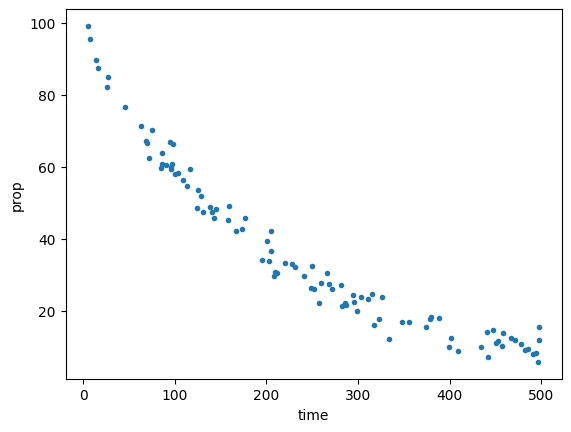

In [14]:
plt.plot(data['time'],data['prop'], '.')
plt.xlabel('time')
plt.ylabel('prop')
plt.show()

Regardons si le modèle linéraire est efficace avec ces données.

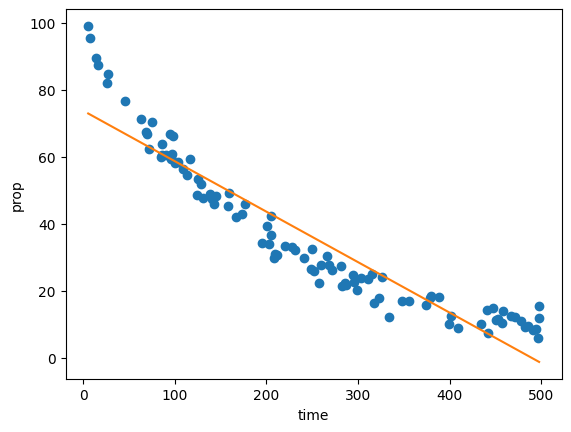

In [15]:
# Ajustement au sens des moindres carrés pour le modèle linéaire
a_modele_lineaire = data.cov()['time']['prop']/data.cov()['time']['time']
b_modele_lineaire = data['prop'].mean() - a_modele_lineaire * data['time'].mean()

data['Modèle linéaire'] = a_modele_lineaire*data['time'] + b_modele_lineaire

# Affichage sur le graphe initial
plt.plot(data['time'], data['prop'], 'o')
plt.plot(data['time'], data['Modèle linéaire'], '-')
plt.xlabel('time')
plt.ylabel('prop')
plt.show()

Si une appréciation visuelle ne nous suffit pas, regardons maintenant les résidus

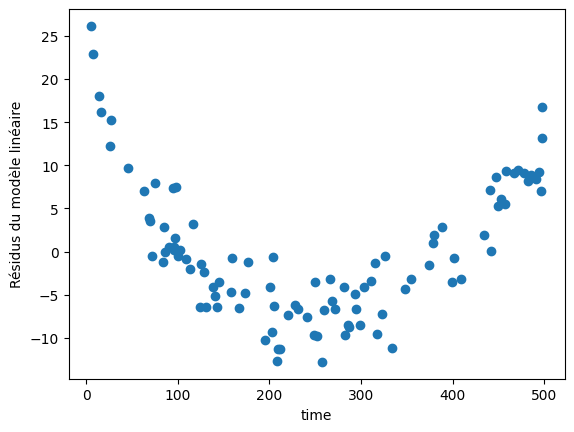

0     26.156013
1     22.947688
2     17.993552
3     16.169808
4     12.263604
        ...    
95     8.457696
96     9.275628
97     7.037303
98    13.132722
99    16.768141
Name: Résidus du modèle linéaire, Length: 100, dtype: float64

In [16]:
# Calcul des résidus du modèle linéaire
data["Résidus du modèle linéaire"] = data.apply(lambda r:r['prop']-r["Modèle linéaire"], axis=1)

# Affichage sous forme de graphique
plt.plot(data['time'], data['Résidus du modèle linéaire'], 'o')
plt.xlabel('time')
plt.ylabel('Résidus du modèle linéaire')
plt.show()

# On affiche également sous forme de tableau
data["Résidus du modèle linéaire"]

On remarque que les résidus sont parfois très éloignés de 0 et qu'il y a une certaine forme en "U" qui se dessine. Cela signifie que le modèle linéaire n'est pas adéquat pour ces données brutes

Question 3.a: 
Le calcul des résidus ne demande pas la valeur absolue. D'ailleurs, il faut idéalement qu'ils soient tantôt positifs tantôt négatifs!!!
1.5/2

- b Passage vers un modèle exponentiel général

Regardons l'effet sur un espace linéaire quand on tente de s'approcher d'un modèle exponentiel.

Regardons en utilisant un Y = ln y (prop)

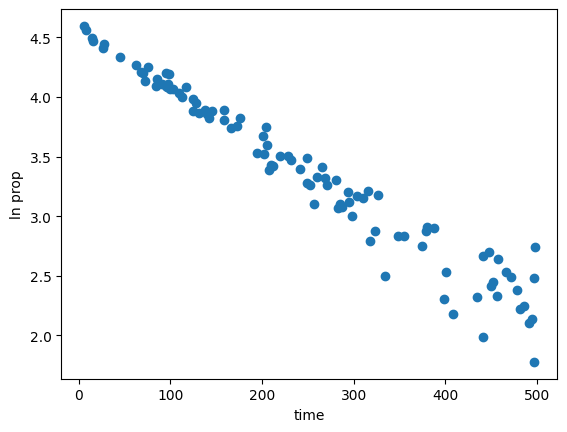

In [17]:
# On passe par le logarithme pour afficher le modèle exponentiel dans un espace linéaire
data['ln prop'] = np.log(data['prop'])

plt.plot(data['time'], data['ln prop'], 'o')
plt.xlabel('time')
plt.ylabel('ln prop')
plt.show()

Cette fois-ci, la forme est bien plus séduisante à l'oeil, continuons sur cette voie.

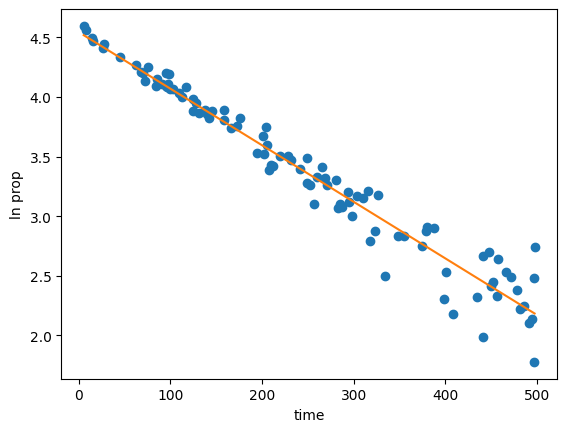

Paramètres ajustés au sens des moindres carrés : A :   -0.00474675685366026 
B :  4.544513418301328


In [18]:
# On calcul les ajustements au sens des moindres carrés pour le modèle exponentiel dans l'espace linéaire
A = data[['time','ln prop']].cov()['time']['ln prop']/data[['time','ln prop']].cov()['time']['time']
B = data['ln prop'].mean() - A * data['time'].mean()

data['Modèle exponentiel espace linéaire'] = A * data['time'] + B

# On affiche sous forme de graphique
plt.plot(data['time'], data['ln prop'], 'o')
plt.plot(data['time'], data['Modèle exponentiel espace linéaire'], '-')
plt.xlabel('time')
plt.ylabel('ln prop')
plt.show()

# On affiche également les paramètres
print("Paramètres ajustés au sens des moindres carrés : A :  ", A, "\nB : ", B)

Maintenant, regardons les résidus de ce modèle exponentiel dans un espace linéaire.

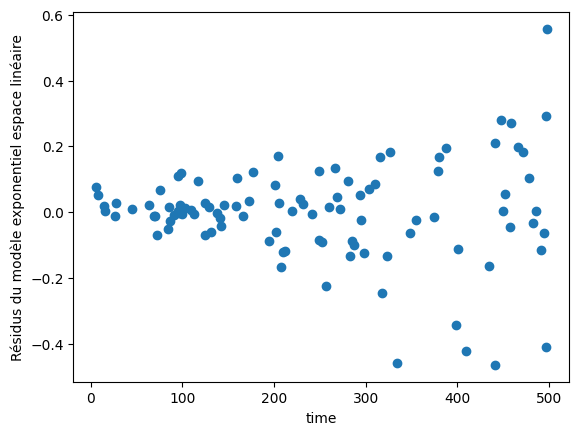

In [19]:
# On calule et affiche les résidus du modèle exponentiel dans l'espace linéaire
data["Résidus du modèle exponentiel espace linéaire"] = data.apply(lambda r:r['ln prop']-r["Modèle exponentiel espace linéaire"], axis=1)
plt.plot(data['time'], data['Résidus du modèle exponentiel espace linéaire'], 'o')
plt.xlabel('time')
plt.ylabel('Résidus du modèle exponentiel espace linéaire')
plt.show()

Par rapport au modèle linéaire, celui-ci propose des écarts beaucoup plus proche de 0. Le modèle exponentiel semble alors bien plus adéquat.

Corr: Question 3.b:
Trop de décimales dans les paramètres du modèle optimal (=> impact sur la clarté globale)
Le calcul des résidus ne demande pas de valeur absolue. D'ailleurs, il faut qu'ils puissent être négatifs pour avoir un équilibre de la distribution autour de zéro.
=> 3.5/4

- C Transformation inverse

Nous allons ramener les éléments dans un espace exponentiel

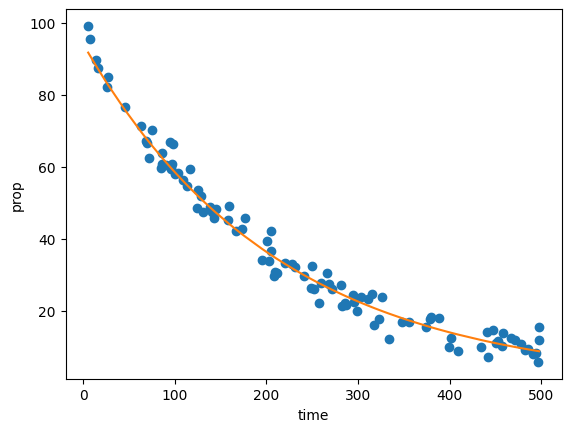

In [20]:
# On remet les éléments dans un espace exponentiel
data['Modèle exponential'] = np.exp(data['Modèle exponentiel espace linéaire'])

plt.plot(data['time'], data['prop'], 'o')
plt.plot(data['time'], data['Modèle exponential'], '-')
plt.xlabel('time')
plt.ylabel('prop')
plt.show()

Superposons cela avec les données initiales pour comparer

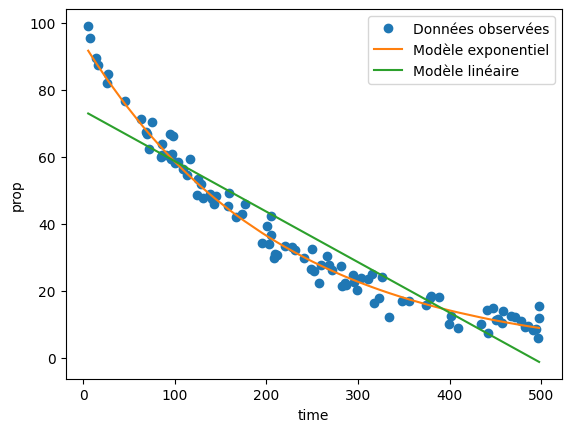

In [21]:
plt.plot(data['time'], data['prop'], 'o', label='Données observées')
plt.plot(data['time'], data['Modèle exponential'], '-', label='Modèle exponentiel')
plt.plot(data['time'], data['Modèle linéaire'], '-', label='Modèle linéaire')

plt.xlabel('time')
plt.ylabel('prop')
plt.legend()
plt.show()

A partir d'une appréciation visuelle, il est évident que le modèle exponentiel convient beaucoup mieux à ce jeu de données.

Dans le cas du modèle linéaire, la courbe à l'air de se moquer des données et ne suit pas du tout leur mouvement tandis que dans le modèle exponentiel général, la courbe suit plutôt bien les données.

Cela confirme que le modèle exponentiel est plus adéquat.

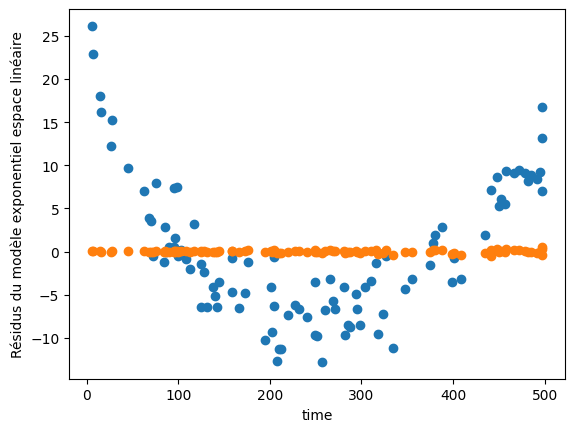

In [22]:
# On calule et affiche les résidus du modèle exponentiel dans l'espace linéaire
plt.plot(data['time'], data['Résidus du modèle linéaire'], 'o')
plt.plot(data['time'], data['Résidus du modèle exponentiel espace linéaire'], 'o')
plt.xlabel('time')
plt.ylabel('Résidus du modèle exponentiel espace linéaire')
plt.show()

Corr: Question 3.c:  
  
Dans l'espace des données originales, tu aurais pu refaire une analyse des résidus (correcte) et comparer les résultats à ton analyse initiale pour le modèle linéaire.  
=> 1/2  
  
Question 3:  
1.5 + 3.5 + 1.5 = 6.5 sur 8  

Clarté globale: 1/2 car trop de chiffres non significatifs sont donnés pour les valeurs  
  
Total:  
5.5 + 1.5 + 6.5 + 1 = 14.5 arrondi à 15